# TP2

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
import joblib
import matplotlib.pyplot as plt 
import matplotlib.pylab as pyl
import numpy as np
import time
import random
import sys
import multiprocessing
n_jobs=multiprocessing.cpu_count()-1

Charger le jeu de données MNIST..

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

Diviser la base de données en 49000 lignes pour l’apprentissage (training) et
le reste pour les tests.

In [3]:
#echantillon = np.savetxt('./sous-ensemble.txt', echantillon, fmt='%d')
echantillon = np.loadtxt('./sous-ensemble.txt', dtype=int)

#car on a besoin de faire la comparaison entre trois modèle et 
#aussi il y a un limit dans la performance de l'ordi perso
#on prend le même base de données que TP1

In [4]:
jeu = mnist.data[echantillon]
jeu_target=mnist.target[echantillon]

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
                train_size = 0.7,test_size=0.3, random_state=42)
print(len(X_train))
print(len(X_test))
print(X_train.shape)

3500
1500
(3500, 784)


Construire un modèle de classification ayant comme paramètre :
hidden_layer_sizes = (50), puis calculez la précession du classifieur ;

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(50))

Afficher la classe de l’image 4 et sa classe prédite.

In [6]:
clf.fit(X_train, y_train)
y_pr=clf.predict(X_test)
class_reel_4 = y_test[4]
print("la classe de l’image 4 : ",class_reel_4)
print("sa classe prédite : ",y_pr[4])

la classe de l’image 4 :  3
sa classe prédite :  3


Calculez la précession en utilisant le package

In [7]:
score = precision_score(y_test,y_pr,average="micro")
print(score)

0.8406666666666667


Varier le nombre de couches de 1 entre (2 et 100) couches, et recalculer la
précision du classifieur.

In [8]:
taille = []
scores = []
y_preds =[]
for i in range(1,101):
    randnums= np.random.randint(1,20,i)
    tuple_size=tuple(50 for e in randnums)
    
    clf = MLPClassifier(hidden_layer_sizes=tuple_size,random_state=42)
    clf.fit(X_train, y_train)
    y_pr=clf.predict(X_test)
    
    score = precision_score(y_test,y_pr,average="micro")
    
    taille.append(i)
    y_preds.append(y_pr)
    scores.append(score)
    
    print(i," ",score)

1   0.8606666666666667
2   0.838
3   0.8086666666666666
4   0.822
5   0.8793333333333333
6   0.876
7   0.8626666666666667
8   0.8926666666666667
9   0.898
10   0.8866666666666667
11   0.9133333333333333
12   0.9013333333333333
13   0.9
14   0.918
15   0.886
16   0.9106666666666666
17   0.912
18   0.9206666666666666
19   0.9073333333333333
20   0.8986666666666666
21   0.892
22   0.92
23   0.9053333333333333
24   0.8973333333333333
25   0.8933333333333333
26   0.9146666666666666
27   0.708
28   0.8926666666666667
29   0.8566666666666667
30   0.8406666666666667
31   0.89
32   0.8626666666666667
33   0.7886666666666666
34   0.8693333333333333
35   0.8066666666666666
36   0.4886666666666667
37   0.6306666666666667
38   0.8186666666666667
39   0.8326666666666667
40   0.7606666666666667
41   0.8193333333333334
42   0.8446666666666667
43   0.7913333333333333
44   0.652
45   0.552
46   0.6466666666666666
47   0.802
48   0.8613333333333333
49   0.8093333333333333
50   0.7826666666666666
51   0.8

Construire cinq modèles de classification des données mnist, avec des
réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de
couches entre 10 et 300 neurones au choix d’une façon aléatoire. Quelles
sont les performances en taux de bonne classification et en temps
d’apprentissage obtenus pour chaque modèle ? Utilisez la fonction time() du
package time pour mesurer le temps d’apprentissage d’un modèle.

couche :  1  score :  0.8626666666666667  time :  2427.91
couche :  3  score :  0.8293333333333334  time :  7984.72
couche :  5  score :  0.874  time :  8154.48
couche :  7  score :  0.932  time :  14561.63
couche :  9  score :  0.9273333333333333  time :  9903.21


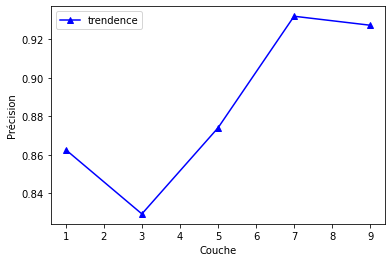

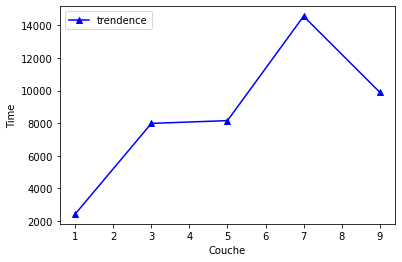

In [12]:
taille_10 = []
scores_10 = []
y_preds_10 =[]
times_10 = []
neurones = []
for i in range(1,10,2):
    randnums= np.random.randint(10,300,i)
    tuple_size=tuple(e for e in randnums)
    
    starttime = time.time()
    
    clf = MLPClassifier(hidden_layer_sizes=tuple_size,random_state=42)
    clf.fit(X_train, y_train)
    y_pr=clf.predict(X_test)
    
    endtime = time.time() 
    
    score = precision_score(y_test,y_pr,average="micro")
    
    taille_10.append(i)
    y_preds_10.append(y_pr)
    scores_10.append(score)
    neurones.append(tuple_size)
    times_10.append(round((endtime - starttime)*1000,2))
    
    joblib.dump(clf, 'saved_models/ann'+str(i)+'.pkl') 
    
    print("couche : ",i," score : ",score," time : ",round((endtime - starttime)*1000,2))

plt.plot(range(1,10,2),scores_10, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('Couche')
plt.ylabel('Précision')
plt.savefig('images/3.1.pre.png')
plt.show()


plt.plot(range(1,10,2),times_10, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('Couche')
plt.ylabel('Time')
plt.savefig('images/3.1.temp.png')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import time
import random
import sys

In [13]:
solvers=['lbfgs', 'sgd', 'adam']
times_kernel = []
score_kernel = []
rappels_kernel = []
accuracys_kernel =[]
erreur_kernel=[]
for sol in solvers:
    starttime = time.time()
    clf = joblib.load('saved_models/ann7.pkl')
    clf.set_params(solver=sol,max_iter=10000)
    clf.fit(X_train, y_train)
    predicted=clf.predict(X_test)
    
    endtime = time.time() 
    times_kernel.append(round((endtime - starttime)*1000,2))
    
    accuracy = clf.score(X_train, y_train)
    accuracys_kernel.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_kernel.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_kernel.append(rappel_score)
    
    erreur=zero_one_loss(y_test, predicted)
    erreur_kernel.append(erreur)
    
    print(sol," ",score)

lbfgs   0.9153333333333333
sgd   0.8933333333333333
adam   0.932


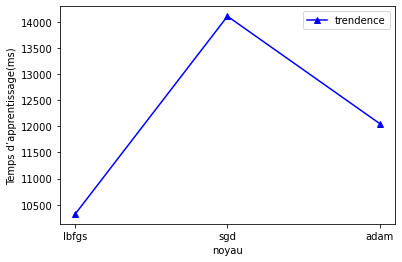

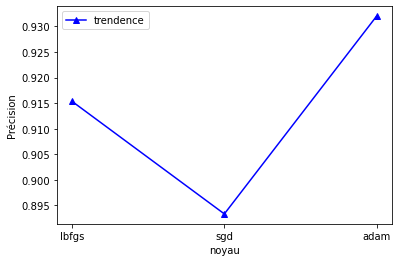

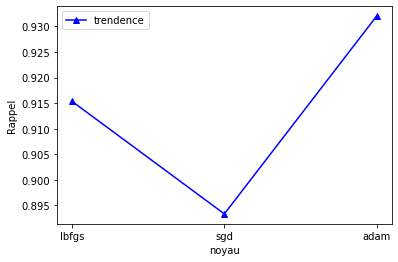

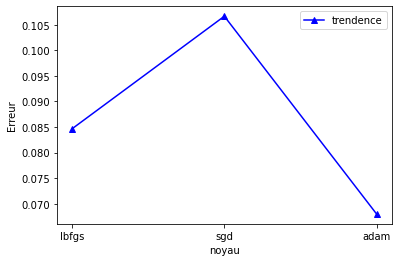

In [14]:
plt.plot(solvers,times_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.savefig('images/3.2.temp.png')
plt.show()


plt.plot(solvers,score_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.savefig('images/3.2.pre.png')
plt.show()


plt.plot(solvers,rappels_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.savefig('images/3.2.rappel.png')
plt.show()


plt.plot(solvers,erreur_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.savefig('images/3.2.erreur.png')
plt.show()


In [15]:
activations=['identity', 'logistic', 'tanh', 'relu']
times_kernel = []
score_kernel = []
rappels_kernel = []
accuracys_kernel =[]
erreur_kernel=[]
for act in activations:
    starttime = time.time()
    clf = joblib.load('saved_models/ann7.pkl')
    clf.set_params(solver='adam',max_iter=10000,activation=act)
    clf.fit(X_train, y_train)
    predicted=clf.predict(X_test)
    
    endtime = time.time() 
    times_kernel.append(round((endtime - starttime)*1000,2))
    
    accuracy = clf.score(X_train, y_train)
    accuracys_kernel.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_kernel.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_kernel.append(rappel_score)
    
    erreur=zero_one_loss(y_test, predicted)
    erreur_kernel.append(erreur)
    
    print(act," ",score)

identity   0.854
logistic   0.6733333333333333
tanh   0.8746666666666667
relu   0.932


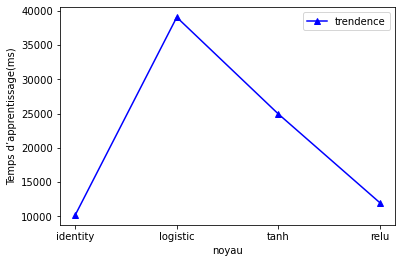

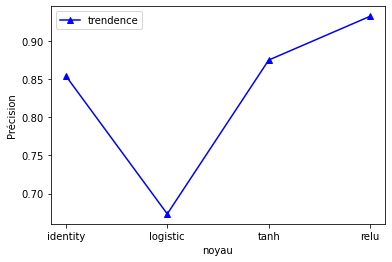

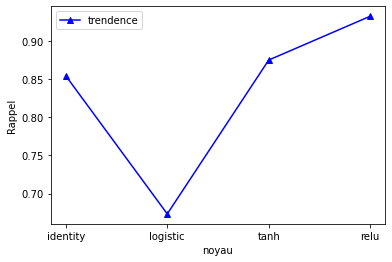

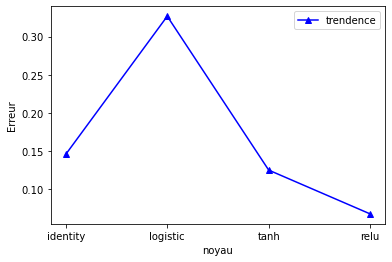

In [16]:
plt.plot(activations,times_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.savefig('images/3.3.temp.png')
plt.show()


plt.plot(activations,score_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.savefig('images/3.3.pre.png')
plt.show()


plt.plot(activations,rappels_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.savefig('images/3.3.rappel.png')
plt.show()


plt.plot(activations,erreur_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.savefig('images/3.3.erreur.png')
plt.show()

In [17]:
print(np.arange (-5, 5,dtype  = float))
#C=10 ** c

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


In [18]:
alphas=np.arange (-5, 6,dtype  = float)
times_kernel = []
score_kernel = []
rappels_kernel = []
accuracys_kernel =[]
erreur_kernel=[]
for l in alphas:
    starttime = time.time()
    clf = joblib.load('saved_models/ann7.pkl')
    clf.set_params(solver='adam',max_iter=10000,activation='relu',alpha=10 ** l)
    clf.fit(X_train, y_train)
    predicted=clf.predict(X_test)
    
    endtime = time.time() 
    times_kernel.append(round((endtime - starttime)*1000,2))
    
    accuracy = clf.score(X_train, y_train)
    accuracys_kernel.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_kernel.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_kernel.append(rappel_score)
    
    erreur=zero_one_loss(y_test, predicted)
    erreur_kernel.append(erreur)
    
    print(l," ",score)

-5.0   0.9286666666666666
-4.0   0.932
-3.0   0.9286666666666666
-2.0   0.932
-1.0   0.9133333333333333
0.0   0.94
1.0   0.938
2.0   0.6646666666666666
3.0   0.10666666666666667
4.0   0.10666666666666667
5.0   0.10666666666666667


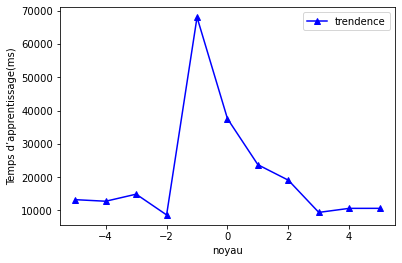

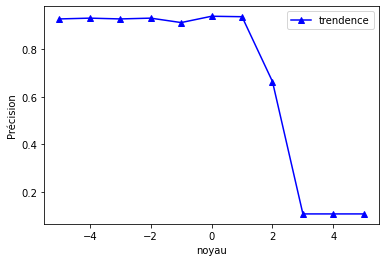

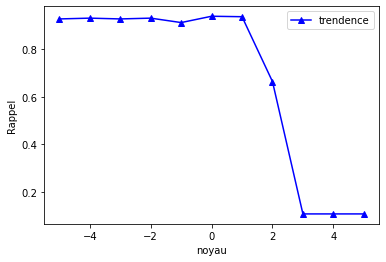

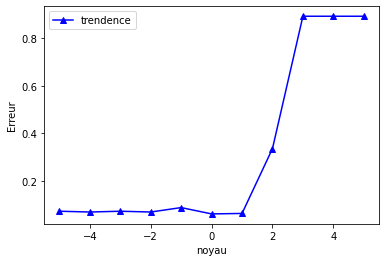

In [19]:
plt.plot(alphas,times_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.savefig('images/3.4.temp.png')
plt.show()


plt.plot(alphas,score_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.savefig('images/3.4.pre.png')
plt.show()


plt.plot(alphas,rappels_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.savefig('images/3.4.rappel.png')
plt.show()


plt.plot(alphas,erreur_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.savefig('images/3.4.erreur.png')
plt.show()


In [20]:
clf = joblib.load('saved_models/ann7.pkl')
clf.set_params(solver='adam',max_iter=10000,activation='relu',alpha=10 ** 0)
joblib.dump(clf, 'saved_models/ann.pkl') 
    

['saved_models/ann.pkl']